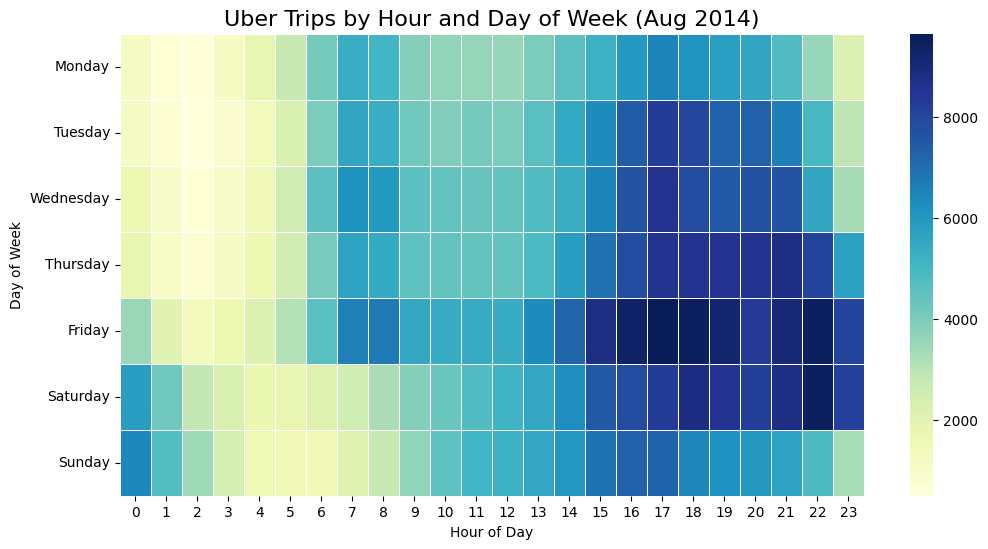

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/uber-raw-data-aug14.csv')
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['DayofWeek'] = df['Date/Time'].dt.day_name()
df['Hour'] = df['Date/Time'].dt.hour
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
heatmap_data = df.pivot_table(index='DayofWeek', columns='Hour', values='Date/Time', aggfunc='count')
heatmap_data = heatmap_data.reindex(days_order)
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlGnBu',linewidth=0.5)
plt.title('Uber Trips by Hour and Day of Week (Aug 2014)',fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


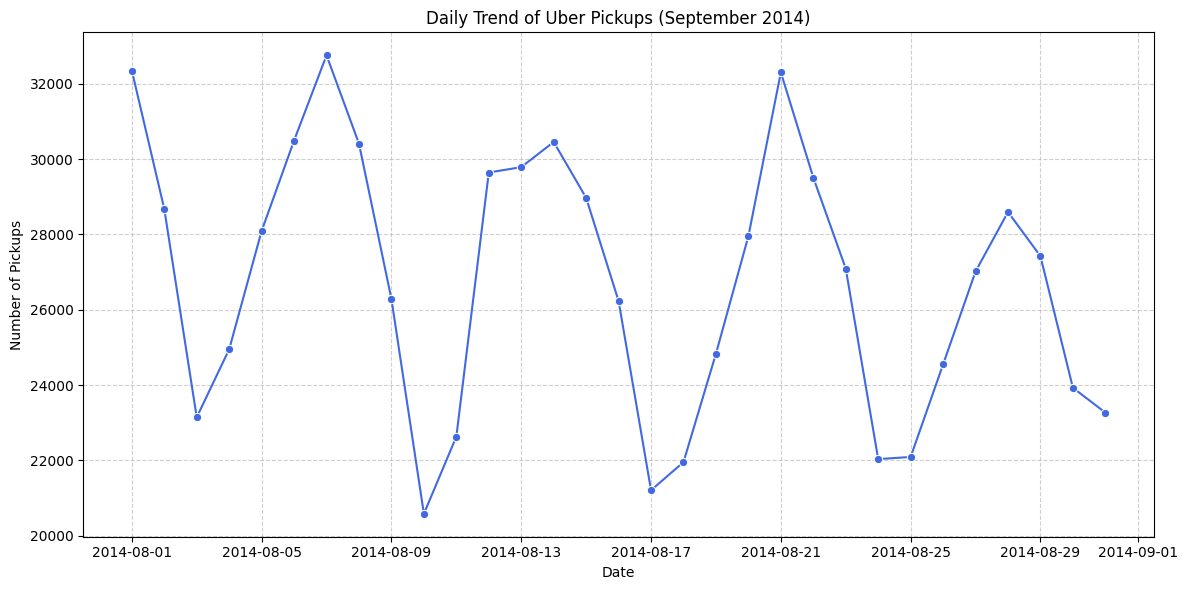

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/uber-raw-data-aug14.csv')
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Date'] = df['Date/Time'].dt.date
daily_pickups = df.groupby('Date').size().reset_index(name='Pickups')

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_pickups, x='Date', y='Pickups', marker='o', color='royalblue')
plt.title('Daily Trend of Uber Pickups (September 2014)')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


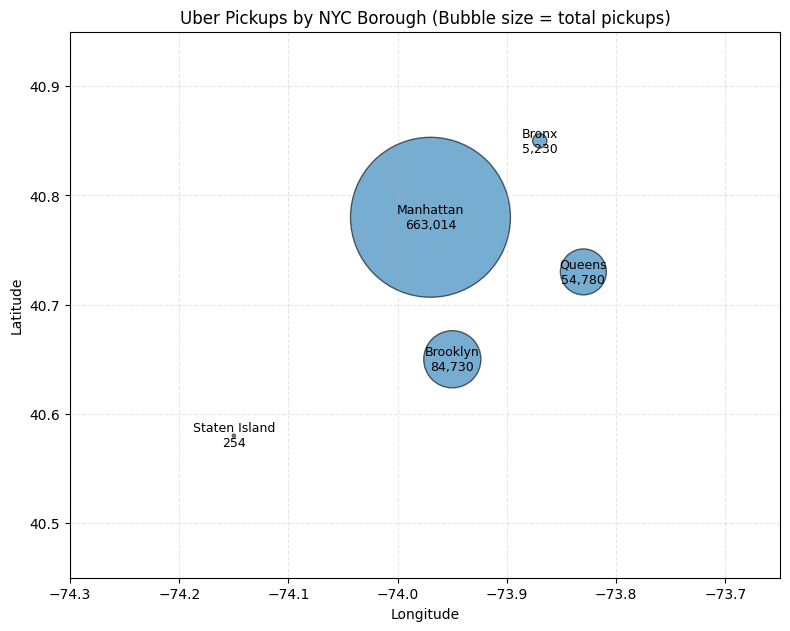

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/uber-raw-data-aug14.csv')
def find_col(cols, candidates):
    for c in cols:
        if c.lower() in candidates:
            return c
    raise ValueError(f"Could not find any of {candidates} in columns: {cols}")

lat_col = find_col(df.columns, {"lat", "latitude"})
lon_col = find_col(df.columns, {"lon", "lng", "longitude"})


df = df.dropna(subset=[lat_col, lon_col])


def borough_from_latlon(lat, lon):
    if 40.70 <= lat <= 40.88 and -74.02 <= lon <= -73.91:
        return "Manhattan"
    if 40.57 <= lat <= 40.73 and -74.05 <= lon <= -73.85:
        return "Brooklyn"
    if 40.54 <= lat <= 40.80 and -73.96 <= lon <= -73.70:
        return "Queens"
    if 40.79 <= lat <= 40.91 and -73.93 <= lon <= -73.77:
        return "Bronx"
    if 40.48 <= lat <= 40.65 and -74.25 <= lon <= -74.05:
        return "Staten Island"
    return "Other"

df["Borough"] = np.vectorize(borough_from_latlon)(df[lat_col].values, df[lon_col].values)

borough_counts = (
    df["Borough"]
    .value_counts()
    .rename_axis("Borough")
    .reset_index(name="Pickups")
)

borough_counts = borough_counts[borough_counts["Borough"].isin(
    ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]
)]

borough_centroids = {
    "Manhattan":      {"lat": 40.78, "lon": -73.97},
    "Brooklyn":       {"lat": 40.65, "lon": -73.95},
    "Queens":         {"lat": 40.73, "lon": -73.83},
    "Bronx":          {"lat": 40.85, "lon": -73.87},
    "Staten Island":  {"lat": 40.58, "lon": -74.15},
}

borough_counts["lat"] = borough_counts["Borough"].map(lambda b: borough_centroids[b]["lat"])
borough_counts["lon"] = borough_counts["Borough"].map(lambda b: borough_centroids[b]["lon"])

scale = 0.02
sizes = borough_counts["Pickups"] * scale


plt.figure(figsize=(8, 8))
plt.scatter(
    borough_counts["lon"],
    borough_counts["lat"],
    s=sizes,
    alpha=0.6,
    edgecolors="black",
    linewidths=1,
)

for _, row in borough_counts.iterrows():
    plt.text(row["lon"], row["lat"], f"{row['Borough']}\n{row['Pickups']:,}",
             ha="center", va="center", fontsize=9)

plt.title("Uber Pickups by NYC Borough (Bubble size = total pickups)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle="--", alpha=0.3)

plt.xlim(-74.3, -73.65)
plt.ylim(40.45, 40.95)
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()